# Example for running MDMC only

In [1]:
from equilibrator_api import ComponentContribution, Q_
from equilibrator_pathway import ThermodynamicModel, Pathway
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import optlang

In [2]:
comp_contrib = ComponentContribution()

Fragments already downloaded
Fragments already downloaded


In [3]:
pp = ThermodynamicModel.from_sbtab(
    "../ecoli_noor_2016_mdf.tsv", comp_contrib=comp_contrib
)
pp.update_standard_dgs()

In [4]:
mdf_sol = pp.mdf_analysis()
print(f"MDF = {mdf_sol.score:.2f} kJ/mol")

MDF = 3.06 kJ/mol


In [5]:
mdf_sol.reaction_df

reaction_id                         reaction_formula  \
0          pts                  glc + pep <=> pyr + g6p   
1          pgi                              g6p <=> f6p   
2          pfk                  atp + f6p <=> adp + fbp   
3          fba                       fbp <=> g3p + dhap   
4          tpi                             dhap <=> g3p   
5          gap            nad + pi + g3p <=> nadh + bpg   
6          pgk                  adp + bpg <=> atp + 3pg   
7          gpm                              3pg <=> 2pg   
8          eno                        2pg <=> h2o + pep   
9          pyk                  adp + pep <=> atp + pyr   
10         pdh  nad + coa + pyr <=> nadh + co2 + acecoa   
11         zwf            nadp + g6p <=> nadph + gluc6p   
12         pgl                     h2o + gluc6p <=> 6pg   
13         gnd        nadp + 6pg <=> nadph + co2 + ru5p   
14         rpi                             ru5p <=> r5p   
15         rpe                            ru5p <=> xu5p   
16        tkt1                 r5p + xu5p <=> g3p + s7p   
17         tal                  g3p + s7p <=> e4p + f6p   
18        tkt2                 xu5p + e4p <=> g3p + f6p   
19         fbp                   h2o + fbp <=> pi + f6p   
20        gltA         h2o + acecoa + oxa <=> coa + cit   
21        acn1                        cit <=> h2o + aco   
22        acn2                       h2o + aco <=> icit   
23         icd          nad + icit <=> nadh + co2 + 2kg   
24         kgd  nad + coa + 2kg <=> nadh + co2 + succoa   
25         suc    adp + pi + succoa <=> atp + coa + suc   
26         sdh                  suc + uql <=> fum + uqn   
27         fum                        h2o + fum <=> mal   
28         mdh                 nad + mal <=> nadh + oxa   
29         ppc             pi + oxa <=> h2o + co2 + pep   

                               flux                     standard_dg_prime  \
0        0.5691 millimolar / second   -45.48435837095887 kilojoule / mole   
1         0.385 millimolar / second    2.661700236513525 kilojoule / mole   
2        0.4417 millimolar / second  -14.598831217708437 kilojoule / mole   
3       0.44702 millimolar / second   22.393224257312113 kilojoule / mole   
4        0.4445 millimolar / second    5.575349871345168 kilojoule / mole   
5        0.9163 millimolar / second    4.602711492658585 kilojoule / mole   
6        0.8946 millimolar / second  -19.315639861920545 kilojoule / mole   
7        0.8729 millimolar / second     4.52040798250934 kilojoule / mole   
8       0.91875 millimolar / second  -3.8108873820313676 kilojoule / mole   
9        0.1841 millimolar / second    -27.5833233583064 kilojoule / mole   
10       0.3787 millimolar / second   -34.02434772279031 kilojoule / mole   
11       0.1813 millimolar / second   -3.923160145715201 kilojoule / mole   
12       0.1568 millimolar / second   -22.52326610960648 kilojoule / mole   
13       0.1323 millimolar / second   10.331992091051518 kilojoule / mole   
14  0.049933333 millimolar / second   -2.079713849932432 kilojoule / mole   
15  0.077233333 millimolar / second   -3.388013622025369 kilojoule / mole   
16       0.0448 millimolar / second   -3.878853068772287 kilojoule / mole   
17       0.0448 millimolar / second  -0.8712610574918926 kilojoule / mole   
18       0.0273 millimolar / second  -10.192340143446188 kilojoule / mole   
19          0.0 millimolar / second                  0.0 kilojoule / mole   
20        0.154 millimolar / second  -35.917153193250726 kilojoule / mole   
21        0.154 millimolar / second    8.467621401283779 kilojoule / mole   
22        0.154 millimolar / second  -1.6243387204222302 kilojoule / mole   
23        0.154 millimolar / second    5.606534488694791 kilojoule / mole   
24       0.0924 millimolar / second  -28.000676037568837 kilojoule / mole   
25       0.1673 millimolar / second   1.7513499411736575 kilojoule / mole   
26       0.0924 millimolar / second   -24.11224044506008 kilojoule / mole   
27       0.0924 m

In [6]:
mdf_sol.compound_df

compound_id                 concentration            lower_bound  \
0          h2o      1.0000000000002336 molar              1.0 molar   
1          atp   0.0034491394999999862 molar   3.4491395 millimolar   
2         nadp  0.00010000000000000383 molar         0.1 millimolar   
3        nadph  0.00011389156999999555 molar  0.11389157 millimolar   
4          adp   0.0006046123700000004 molar  0.60461237 millimolar   
5          nad   0.0010000000000014843 molar         1.0 millimolar   
6           pi    0.009999999999998494 molar        10.0 millimolar   
7         nadh  2.7415129999959254e-05 molar  0.02741513 millimolar   
8          coa   0.0010000000000001104 molar         1.0 millimolar   
9          co2   9.999999999998258e-06 molar        0.01 millimolar   
10         2kg   8.791086180239464e-05 molar       0.001 millimolar   
11      acecoa   0.0010058824892181992 molar       0.001 millimolar   
12         pyr  0.00011512639537680033 molar       0.001 millimolar   
13         suc    0.000209751423324588 molar       0.001 millimolar   
14         glc    0.012000000000001853 molar        12.0 millimolar   
15         oxa   9.999999999987624e-07 molar       0.001 millimolar   
16         pep  2.2681762931227105e-06 molar       0.001 millimolar   
17         g3p   8.758891431537405e-05 molar       0.001 millimolar   
18        dhap   0.0021889958941029974 molar       0.001 millimolar   
19      succoa    0.002412459268853266 molar       0.001 millimolar   
20         fum    0.009999999999925646 molar       0.001 millimolar   
21         mal     0.01000000000000385 molar       0.001 millimolar   
22         r5p   7.572932230342487e-05 molar       0.001 millimolar   
23         3pg  0.00012699136542567566 molar       0.001 millimolar   
24         cit    0.003970462481136732 molar       0.001 millimolar   
25        ru5p   0.0012902679939235824 molar       0.001 millimolar   
26         g6p   0.0022287669078499784 molar       0.001 millimolar   
27         uql  0.00010000000000000098 molar         0.1 millimolar   
28        xu5p   0.0001821074047172156 molar       0.001 millimolar   
29         uqn   9.999999999999903e-05 molar         0.1 millimolar   
30         e4p  1.9087845912442434e-05 molar       0.001 millimolar   
31         bpg  1.4225240662721851e-06 molar       0.001 millimolar   
32         s7p   9.982945084467013e-05 molar       0.001 millimolar   
33         2pg   4.375807282164966e-06 molar       0.001 millimolar   
34         6pg  0.00014730196997478657 molar       0.001 millimolar   
35         fbp    0.004901016567006113 molar       0.001 millimolar   
36      gluc6p   2.162190307102632e-05 molar       0.001 millimolar   
37         aco   5.381522097321956e-06 molar       0.001 millimolar   
38        icit   3.518588719087803e-06 molar       0.001 millimolar   
39         f6p  6.0445153887265643e-05 molar       0.001 millimolar   

              upper_bound  shadow_price  
0               1.0 molar       0.10311  
1    3.4491395 millimolar      -0.00000  
2          0.1 millimolar      -0.00000  
3   0.11389157 millimolar       0.00000  
4   0.60461237 millimolar       0.00000  
5          1.0 millimolar       2.37452  
6         10.0 millimolar       0.00000  
7   0.02741513 millimolar      -2.37452  
8          1.0 millimolar      -0.00000  
9         0.01 millimolar       0.00000  
10        10.0 millimolar       0.00000  
11        10.0 millimolar       0.00000  
12        10.0 millimolar       0.00000  
13        10.0 millimolar       0.00000  
14        12.0 millimolar      -0.00000  
15        10.0 millimolar      -2.37452  
16        10.0 millimolar      -0.00000  
17        10.0 millimolar       0.00000  
18        10.0 millimolar       0.00000  
19        10.0 millimolar       0.00000  
20        10.0 millimolar       0.10311  
21        10.0 millimolar       2.27141  
22        10.0 millimolar      -0.00000  
23        10.0 millimolar      -0.00000  
24        10.0 millimolar       0.00000  

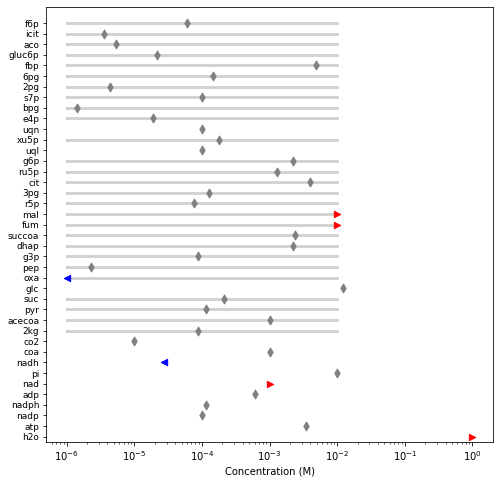

In [7]:
mdf_sol.plot_concentrations()

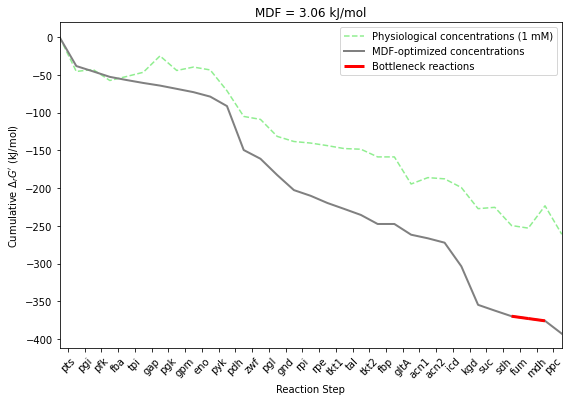

In [8]:
mdf_sol.plot_driving_forces()

# solving MDMC using OSQP

In [9]:
mdmc_sol = pp.mdmc_analysis(min_lb=0, max_lb=10)

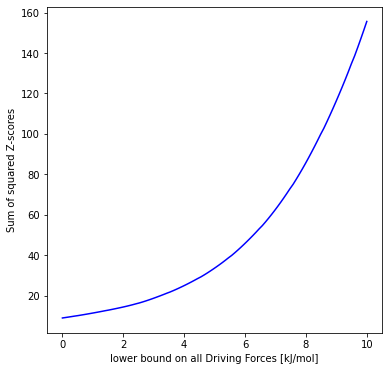

In [10]:
mdmc_sol.plot_objectives()

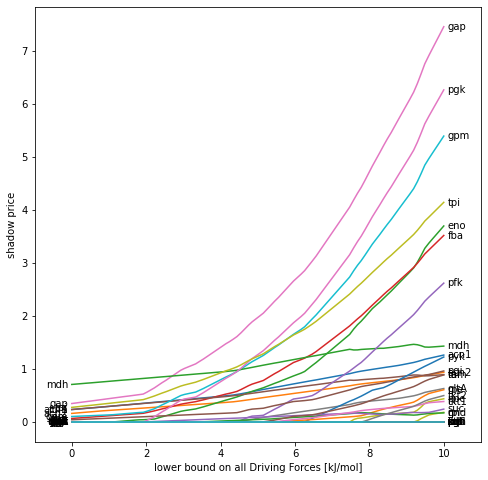

In [11]:
mdmc_sol.plot_reaction_prices(normalized=False)

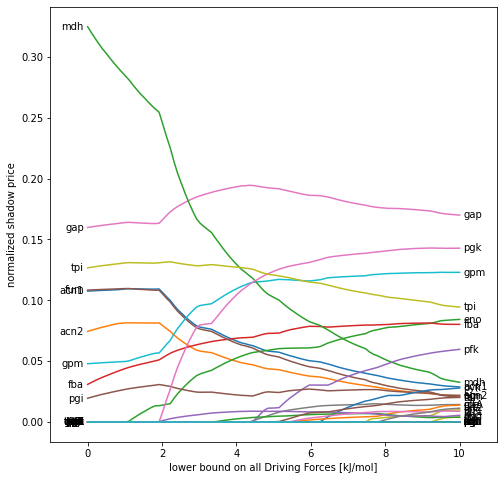

In [12]:
mdmc_sol.plot_reaction_prices(normalized=True)

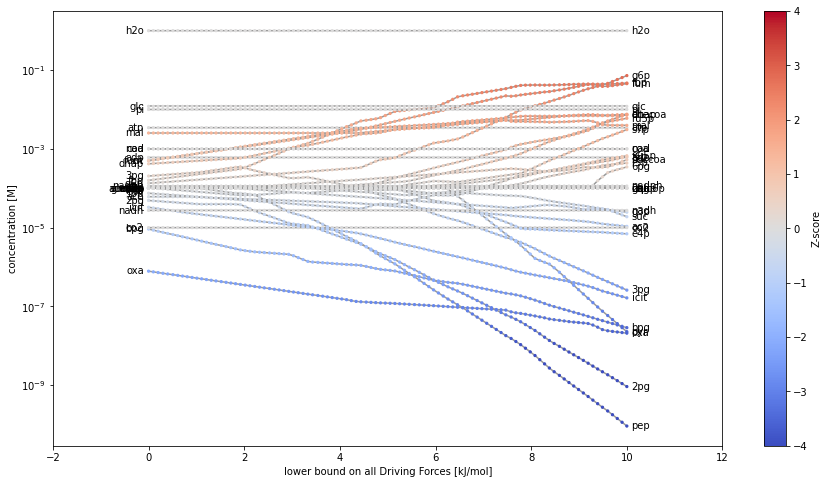

In [13]:
mdmc_sol.plot_concentrations()